In [ ]:
"""This sript reads xlsx files provided by Facebook with a glimpse of data on Visible Hand group.
Each file consists of several sheets, where two are of interest for this analysis:
a) Daily numbers, with data like date, number of new posts, etc
b) top posts, where posts from last 28 days are collected."""

In [46]:
# Import libraries

import pandas as pd
import os
import googletrans as gt
import matplotlib.pyplot as plt
from googletrans import Translator
from collections import Counter

Index(['Date', 'Posts', 'Comments', 'Reactions', 'Active members',
       'Total members', 'Pending members', 'Approved member requests',
       'Declined member requests'],
      dtype='object')


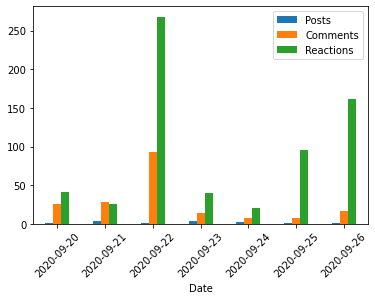

In [45]:
# Reading the first file, and ploting posts, comments and reactions over time

glimpse = pd.read_excel("data/Facebook_Group_Insights_10-25-2020.xlsx", sheet_name="Daily numbers")
print(glimpse.columns)
glimpse.head()
glimpse.plot(kind="bar", x="Date", y=["Posts", "Comments", "Reactions"])
plt.xticks(rotation=45)
plt.show()

In [43]:
# Use Google Tranlsate to translate content of posts.

texts = pd.read_excel("data/Facebook_Group_Insights_10-25-2020.xlsx", sheet_name="Top posts (last 28 days)")
print(texts.head())

translator = Translator()

eng_text = []

for row in texts['Posts']: 
    if isinstance(row, str):
        eng_text.append(translator.translate(row).text)
    else:
        eng_text.append("empty entry")

texts['Posts_en'] = eng_text


                                               Posts  \
0  Edit: \nLudzie jesteście wspaniali!!! Mamy już...   
1  #koronawirus#rozmowa#\nCzy ktoś właśnie walczy...   
2  16 zaleceń na czas pandemii\n—-\nDrogie osoby☝...   
3  Drodzy,\n\nszukam pomocy dla bardzo samotnej P...   
4  Czy jest tu jakaś dobra dusza z Rzeszowa, któr...   

                         Member  Comments  Reactions  Views  \
0        Julia Ewa Hertmanowska       188        714  53593   
1                 Ania Augustyn       136        649  48515   
2                Filip Żulewski       106        777  33188   
3   Kamilla Hertmanowska-Maniuk       107        693  45601   
4  Izabela Zdolinska-Malinowska        40        439  40967   

                                                Link  
0  https://www.facebook.com/groups/widzialnareka/...  
1  https://www.facebook.com/groups/widzialnareka/...  
2  https://www.facebook.com/groups/widzialnareka/...  
3  https://www.facebook.com/groups/widzialnareka/...  
4  https:

In [44]:
texts.head()

,Posts,Member,Comments,Reactions,Views,Link,Posts_en
0,Edit: \nLudzie jesteście wspaniali!!! Mamy już...,Julia Ewa Hertmanowska,188,714,53593,https://www.facebook.com/groups/widzialnareka/...,Edit:\nYou guys are great !!! We already have ...
1,#koronawirus#rozmowa#\nCzy ktoś właśnie walczy...,Ania Augustyn,136,649,48515,https://www.facebook.com/groups/widzialnareka/...,# coronavirus # conversation #\nIs anyone curr...
2,16 zaleceń na czas pandemii\n—-\nDrogie osoby☝...,Filip Żulewski,106,777,33188,https://www.facebook.com/groups/widzialnareka/...,16 recommendations for the time of a pandemic\...
3,"Drodzy,\n\nszukam pomocy dla bardzo samotnej P...",Kamilla Hertmanowska-Maniuk,107,693,45601,https://www.facebook.com/groups/widzialnareka/...,Dear\n\nI am looking for help for a very lonel...
4,"Czy jest tu jakaś dobra dusza z Rzeszowa, któr...",Izabela Zdolinska-Malinowska,40,439,40967,https://www.facebook.com/groups/widzialnareka/...,Is there any good soul from Rzeszów who would ...


In [49]:
# In order to to word popularity chart, we will collapse all the entries in to one, split into list and remove stopwords from given list.

eng_entry_list = texts['Posts_en'].str.cat(sep=' ')
eng_entry_list.split()

['Edit:',
 'You',
 'guys',
 'are',
 'great',
 '!!!',
 'We',
 'already',
 'have',
 'a',
 'lot',
 'of',
 'things',
 'for',
 'Mrs.',
 'Maria.',
 'Today,',
 'since',
 'my',
 'return',
 '(yesterday',
 'evening)',
 'from',
 'the',
 'hospital,',
 'Maria,',
 'washed,',
 'full,',
 'comfortably',
 'seated,',
 'drunk',
 'and',
 'smiling,',
 'thank',
 'you',
 'very',
 'much',
 '!!',
 'As',
 'for',
 'help',
 'with',
 'injections,',
 'care',
 'and',
 'shopping,',
 'we',
 'will',
 'arrange',
 'everything',
 'with',
 'Maria',
 'at',
 'the',
 'weekend',
 'and',
 'we',
 'will',
 'talk',
 'to',
 'those',
 'of',
 'you',
 'who',
 'offered',
 'help.',
 'I',
 'am',
 'in',
 'touch',
 'with',
 'the',
 'Social',
 'Welfare',
 'Lady',
 'who',
 'will',
 'do',
 'anything',
 'to',
 'arrange',
 'a',
 'babysitter',
 'as',
 'soon',
 'as',
 'possible',
 '(but',
 'it',
 'will',
 'take',
 'at',
 'least',
 'one',
 'more',
 'week).',
 'There',
 'is',
 'one',
 'more',
 'thing',
 'that',
 'Mrs.',
 'Maria',
 'needs',
 'very',
